In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

sns.set_theme(context='notebook')
plt.style.use('fivethirtyeight')

## Load the clean dataset

In [2]:
df = pd.read_csv('data/Airbnb_Open_Data_clean.csv', low_memory=False, parse_dates=['last review'])
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102058 entries, 0 to 102057
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102058 non-null  int64         
 1   NAME                            101808 non-null  object        
 2   host id                         102058 non-null  int64         
 3   host_identity_verified          101769 non-null  object        
 4   host name                       102058 non-null  object        
 5   neighbourhood group             102029 non-null  object        
 6   neighbourhood                   102042 non-null  object        
 7   lat                             102050 non-null  float64       
 8   long                            102050 non-null  float64       
 9   country                         101526 non-null  object        
 10  country code                    101927 non-null  object 

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,False,strict,Private room,2020.0,966.0,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,False,moderate,Entire home/apt,2007.0,142.0,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,US,True,flexible,Private room,2005.0,620.0,124.0,3.0,0.0,NaT,0.00,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,US,True,moderate,Entire home/apt,2005.0,368.0,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,No rules specified,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,False,moderate,Entire home/apt,2009.0,204.0,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


## EDA

#### Notes from the cleaning stage

**Categorical columns**:
- neighbourhood group: *Δύο τιμές χρειάζονται διόρθωση για να έχουν ομοιογένεια manhattan, brooklyn. Φαίνεται χρήσιμη μεταβλητή.*
- neighbourhood: *Λόγω του πλήθους των γειτονιών ενδεχομένως να δούμε μόνο 5 ή 10 πιο δημοφιλείς ή τις 5/10 μη δημοφιλής*
- instant_bookable: *Μοιρασμένη κατηγορία (ενδεχομένη σύγκριση με το price και τα review numbers)*
- cancellation_policy: *Επίσης μοιρασμένη κατηγορία (ενδεχομένη σύγκριση με το price και τα review numbers)*
- room type: *Δύο κατηγορίες είναι επικρατέστερες και θα μπορούσαμε να τις συγκρίνουμε με το price και τα review numbers*
- house_rules
- license: *Πολλές κενές μεταβλητές για να είναι χρήσιμο*

**Numerical columns**
- price: *Ομοιόμορφη κατανομή, χρήσιμη για σύγκριση με ποιοτικές μεταβλητές*
- service fee: *Επίσης ομοιόμορφη κατανομή*
- minimum nights: *Υπάρχουν εγγραφές με ακραίες τιμές όπως επίσης και αρκετές ?αρνητικές?*
- number of reviews: *Οι περισσότερες τιμές κυμαίνονται από 0 έως 31 με κάποιες ακραίες τιμές (ενδεχομένως θα μπορούσα να το χρησιμοποιήσουμε ως δείκτη δημοφιλίας)*
- reviews per month: *Το ίδιο με το `number of reviews`*
- review rate number: *Το ίδιο με το `number of reviews`*
- availability 365: *Επίσης ορισμένες αρνητικές τιμές*

**Others**
- Construction year: *Ομοιογενή κατανομή από 2003 έως 2022*
- lat: *Χρήσιμα για απεικόνιση*
- long: *Χρήσιμα για απεικόνιση*
- last review: *Υπάρχουν λανθασμένες καταχωρήσεις*

### Inspect each variable

In [3]:
# create function to check categorical variables

def describe_categorical_variable(df, variable):

    missing = df[variable].isna().sum()
    
    df[variable].value_counts(ascending=True).plot.barh(title=variable)

    print(f'{variable} column has {missing} missing values')
    
    return df[variable].value_counts()

# create function to check numerical variables

def describe_numeric_variable(df, variable, bins=50):

    missing = df[variable].isna().sum()

    fig, axes = plt.subplots(2, 1)
    
    df[variable].plot.hist(bins=bins, ax=axes[0])
    df[variable].plot.box(vert=False)
    plt.suptitle(f'{variable} distribution')

    plt.tight_layout()

    print(f'{variable} column has {missing} missing values')
    
    return df[variable].describe().to_frame().T

In [4]:
cat_columns = ['neighbourhood group', 'neighbourhood', 'instant_bookable', 'cancellation_policy', 'room type']
num_colums = ['price', 'service fee', 'minimum nights', 'number of reviews', 'reviews per month', 'review rate number', 'availability 365']
others = ['Construction year', 'lat', 'long', 'last review']

neighbourhood group column has 29 missing values
--neighbourhood group--
Manhattan        43558
Brooklyn         41631
Queens           13197
Bronx             2694
Staten Island      949
Name: neighbourhood group, dtype: int64



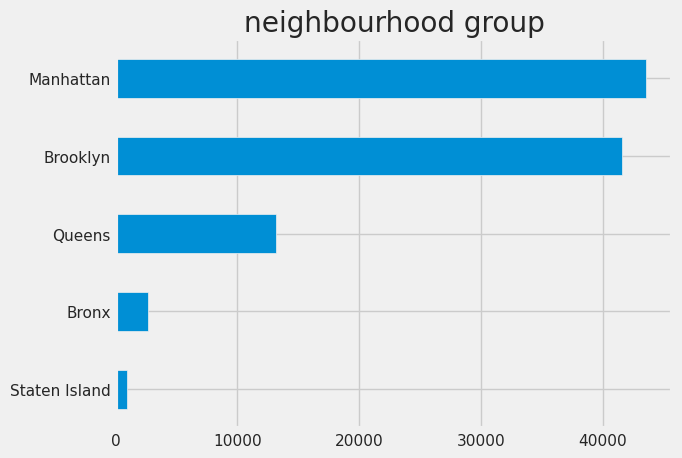

neighbourhood column has 16 missing values
--neighbourhood--
Bedford-Stuyvesant        7898
Williamsburg              7732
Harlem                    5441
Bushwick                  4956
Hell's Kitchen            3949
                          ... 
Willowbrook                  3
Gerritsen Beach              3
Fort Wadsworth               2
Glen Oaks                    2
Chelsea, Staten Island       1
Name: neighbourhood, Length: 224, dtype: int64



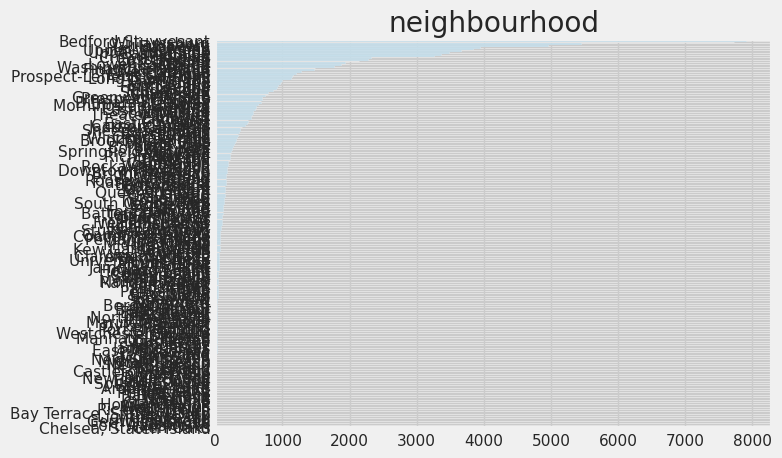

instant_bookable column has 105 missing values
--instant_bookable--
False    51186
True     50767
Name: instant_bookable, dtype: int64



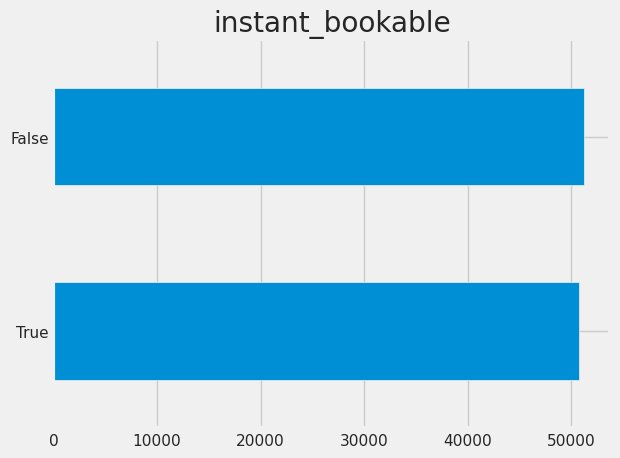

cancellation_policy column has 76 missing values
--cancellation_policy--
moderate    34162
strict      33929
flexible    33891
Name: cancellation_policy, dtype: int64



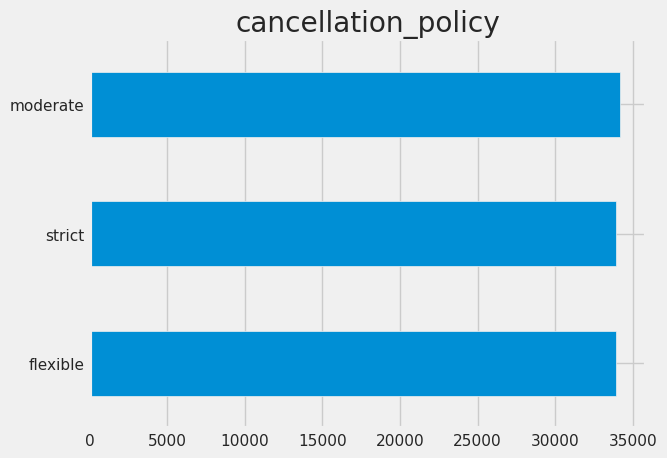

room type column has 0 missing values
--room type--
Entire home/apt    53429
Private room       46306
Shared room         2208
Hotel room           115
Name: room type, dtype: int64



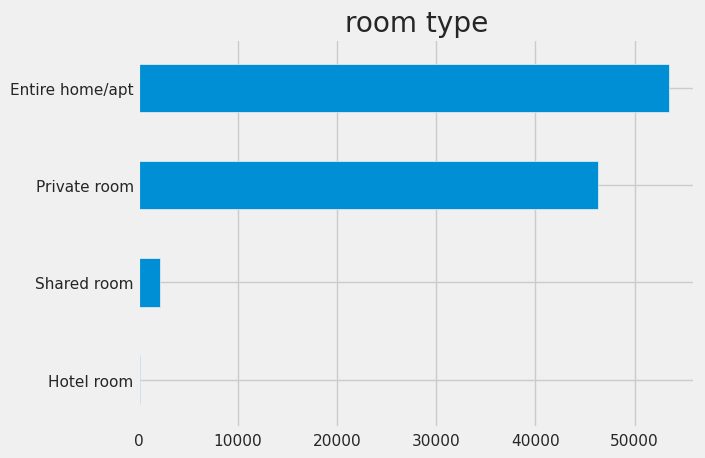

In [5]:
for col in cat_columns:
    print(f'--{col}--', describe_categorical_variable(df, col), sep='\n', end='\n\n')
    plt.show()

price column has 0 missing values
--price--
          count       mean         std   min    25%    50%    75%     max
price  102058.0  625.35472  331.271047  50.0  341.0  625.0  912.0  1200.0



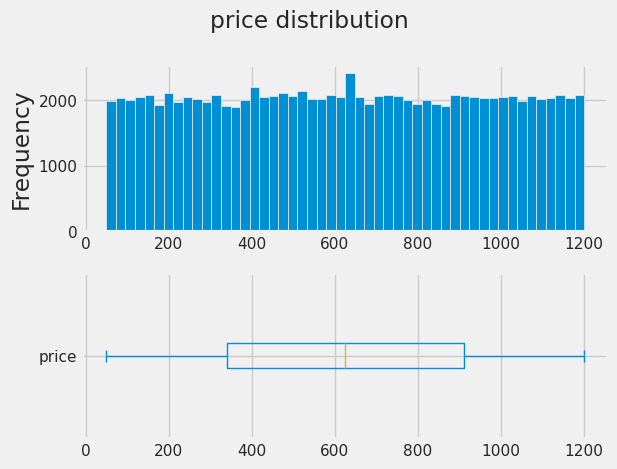




service fee column has 0 missing values
--service fee--
                count        mean        std   min   25%    50%    75%    max
service fee  102058.0  125.039144  66.237136  10.0  68.0  125.0  182.0  240.0



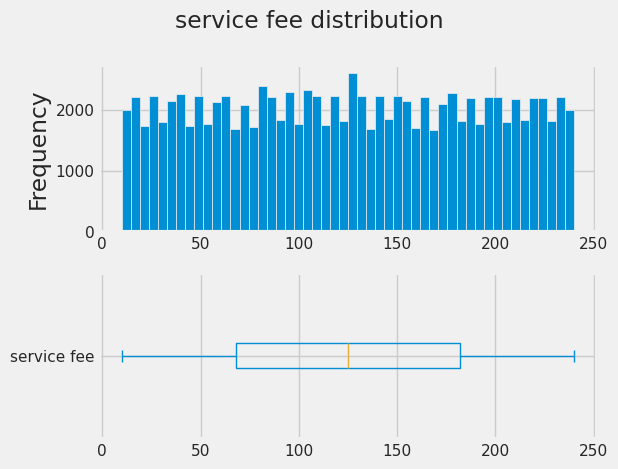




minimum nights column has 400 missing values
--minimum nights--
                   count     mean        std     min  25%  50%  75%     max
minimum nights  101658.0  8.12664  30.616698 -1223.0  2.0  3.0  5.0  5645.0



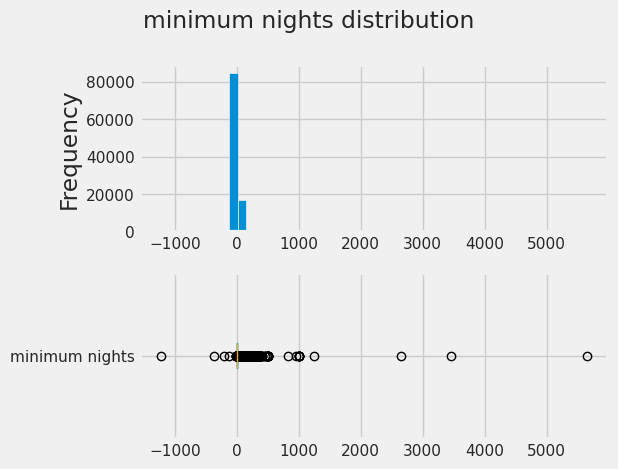




number of reviews column has 183 missing values
--number of reviews--
                      count       mean        std  min  25%  50%   75%     max
number of reviews  101875.0  27.517948  49.571744  0.0  1.0  7.0  31.0  1024.0



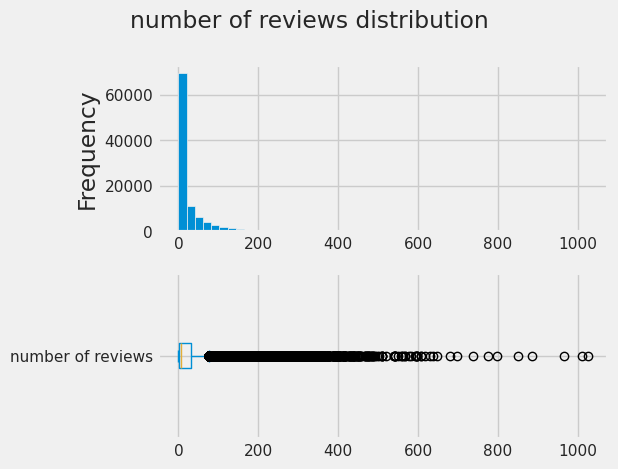




reviews per month column has 0 missing values
--reviews per month--
                      count      mean       std  min   25%   50%   75%   max
reviews per month  102058.0  1.162233  1.682184  0.0  0.09  0.48  1.71  90.0



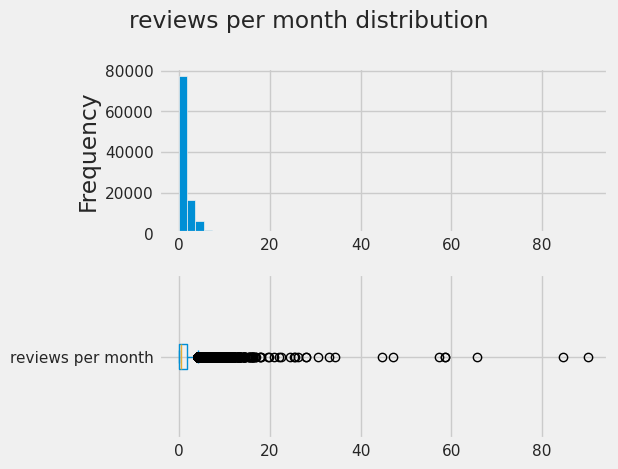




review rate number column has 319 missing values
--review rate number--
                       count      mean       std  min  25%  50%  75%  max
review rate number  101739.0  3.278733  1.285089  1.0  2.0  3.0  4.0  5.0



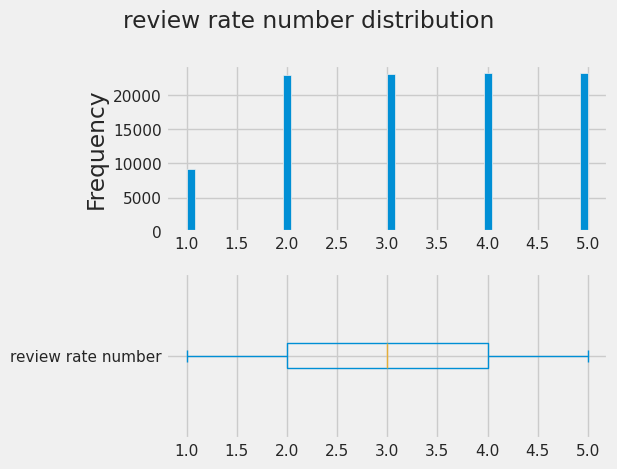




availability 365 column has 448 missing values
--availability 365--
                     count        mean         std   min  25%   50%    75%  \
availability 365  101610.0  141.043992  135.429156 -10.0  3.0  96.0  268.0   

                     max  
availability 365  3677.0  



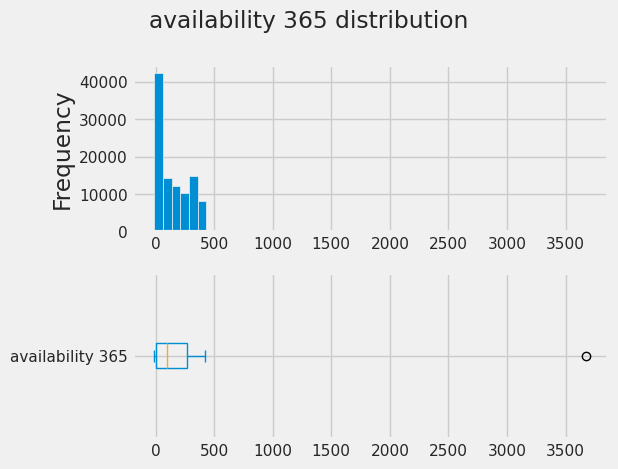

In [6]:
for col in num_colums:
    print(f'--{col}--', describe_numeric_variable(df, col), sep='\n', end='\n\n')
    plt.show()
    print('\n\n')

Construction year has 214 missing values


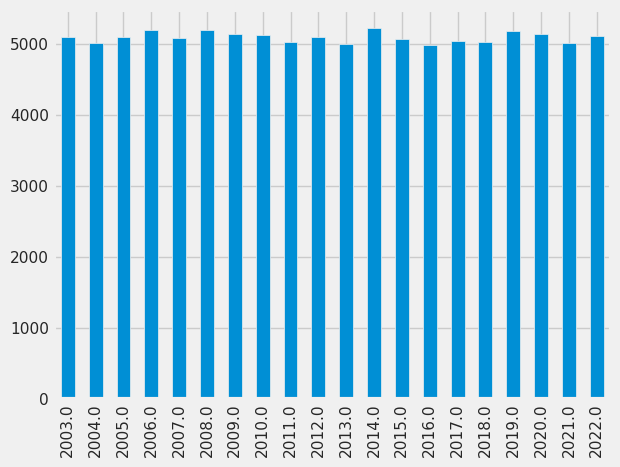

In [7]:
missing = df['Construction year'].isna().sum()
print(f'Construction year has {missing} missing values')

df['Construction year'].value_counts().sort_index().plot.bar();

In [8]:
missing = df['last review'].isna().sum()
print(f'last review column has {missing} missing values')

min_date, max_date = df['last review'].min(), df['last review'].max()

print(f'Dates are from {min_date} to {max_date}')

last review column has 15832 missing values
Dates are from 2012-07-11 00:00:00 to 2058-06-16 00:00:00


### Inspect relationship between variables

#### Price vs qualitative variables

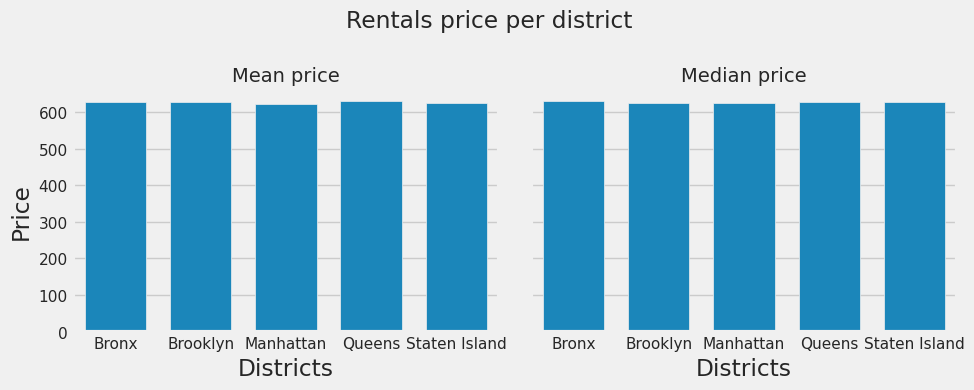

In [9]:
neighbourhood_price_mean = df[['neighbourhood group', 'price']].groupby('neighbourhood group', as_index=False)['price'].mean()
neighbourhood_price_median = df[['neighbourhood group', 'price']].groupby('neighbourhood group', as_index=False)['price'].median()

fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)
sns.barplot(data=neighbourhood_price_mean, x='neighbourhood group', y='price', ax=axes[0], gap=0.1)
sns.barplot(data=neighbourhood_price_median, x='neighbourhood group', y='price', ax=axes[1], gap=0.1)
for ax in axes:
    ax.set(xlabel='Districts', ylabel='Price')
axes[0].set_title('Mean price', fontsize=14)
axes[1].set_title("Median price", fontsize=14)
fig.suptitle("Rentals price per district")
fig.tight_layout();

In [10]:
df.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

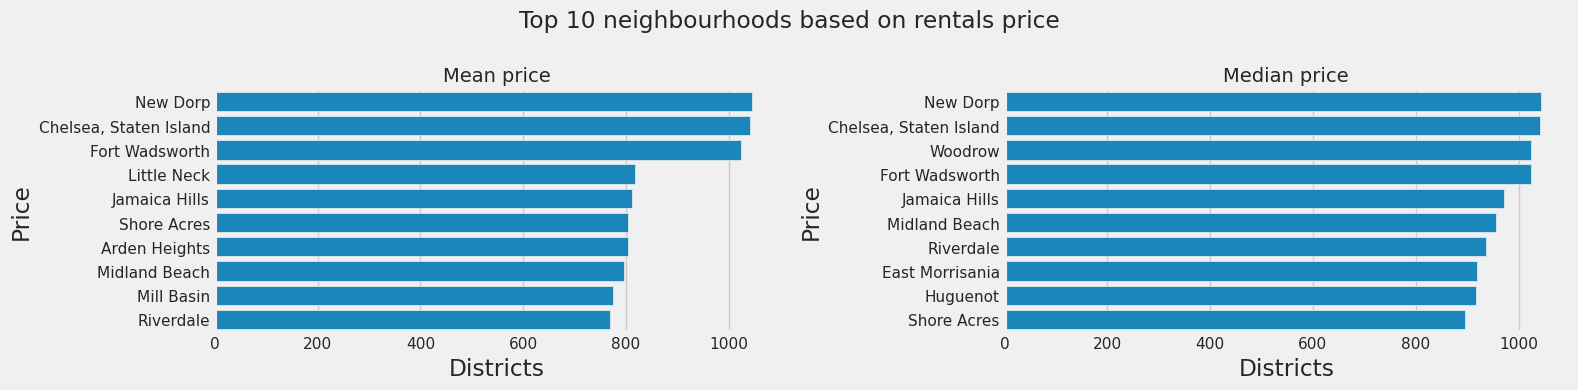

In [11]:
neighbourhood_price_mean = df[['neighbourhood', 'price']].groupby('neighbourhood', as_index=False)['price'].mean().nlargest(10, columns='price')
neighbourhood_price_median = df[['neighbourhood', 'price']].groupby('neighbourhood', as_index=False)['price'].median().nlargest(10, columns='price')

fig, axes = plt.subplots(1, 2, figsize=(16, 4))
sns.barplot(data=neighbourhood_price_mean, x='price', y='neighbourhood', ax=axes[0], orient='horizontal')
sns.barplot(data=neighbourhood_price_median, x='price', y='neighbourhood', ax=axes[1], orient='horizontal')
for ax in axes:
    ax.set(xlabel='Districts', ylabel='Price')
axes[0].set_title('Mean price', fontsize=14)
axes[1].set_title("Median price", fontsize=14)
fig.suptitle("Top 10 neighbourhoods based on rentals price")
fig.tight_layout();

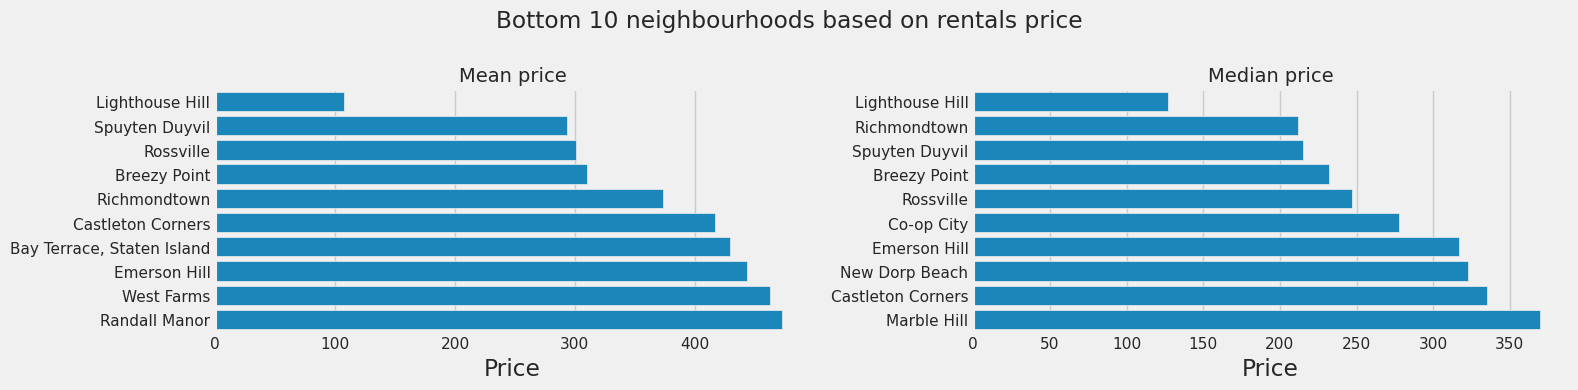

In [12]:
neighbourhood_price_mean = df[['neighbourhood', 'price']].groupby('neighbourhood', as_index=False)['price'].mean().nsmallest(10, columns='price')
neighbourhood_price_median = df[['neighbourhood', 'price']].groupby('neighbourhood', as_index=False)['price'].median().nsmallest(10, columns='price')

fig, axes = plt.subplots(1, 2, figsize=(16, 4))
sns.barplot(data=neighbourhood_price_mean, x='price', y='neighbourhood', ax=axes[0], orient='horizontal')
sns.barplot(data=neighbourhood_price_median, x='price', y='neighbourhood', ax=axes[1], orient='horizontal')
for ax in axes:
    ax.set(xlabel='Price', ylabel='')
axes[0].set_title('Mean price', fontsize=14)
axes[1].set_title("Median price", fontsize=14)
fig.suptitle("Bottom 10 neighbourhoods based on rentals price")
fig.tight_layout();

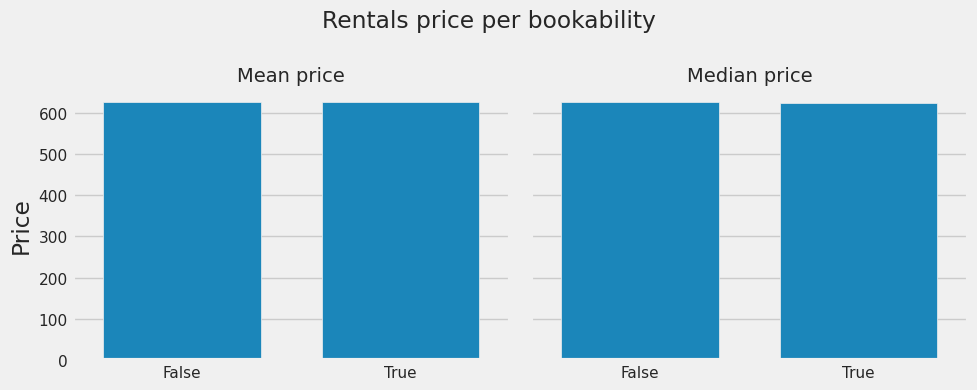

In [13]:
# instant_bookable
bookable_price_mean = df[['instant_bookable', 'price']].groupby('instant_bookable', as_index=False)['price'].mean()
bookable_price_median = df[['instant_bookable', 'price']].groupby('instant_bookable', as_index=False)['price'].median()

fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)
sns.barplot(data=bookable_price_mean, x='instant_bookable', y='price', ax=axes[0], gap=0.1)
sns.barplot(data=bookable_price_median, x='instant_bookable', y='price', ax=axes[1], gap=0.1)
for ax in axes:
    ax.set(xlabel='', ylabel='Price')
axes[0].set_title('Mean price', fontsize=14)
axes[1].set_title("Median price", fontsize=14)
fig.suptitle("Rentals price per bookability")
fig.tight_layout();

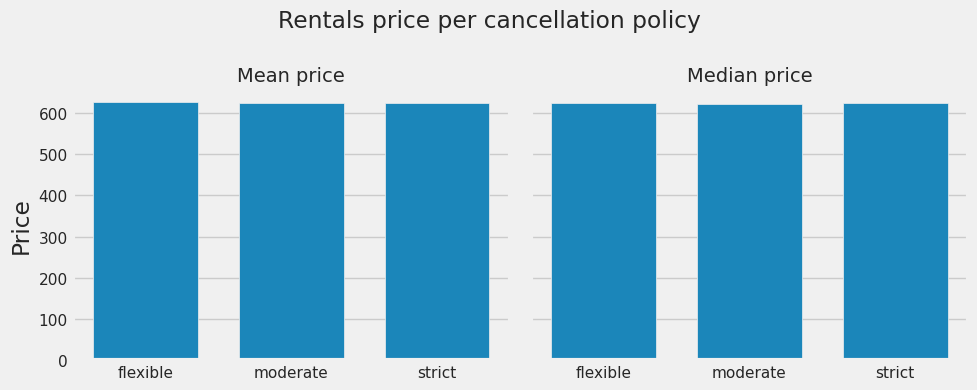

In [14]:
# cancellation_policy

cancellation_price_mean = df[['cancellation_policy', 'price']].groupby('cancellation_policy', as_index=False)['price'].mean()
cancellation_price_median = df[['cancellation_policy', 'price']].groupby('cancellation_policy', as_index=False)['price'].median()

fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)
sns.barplot(data=cancellation_price_mean, x='cancellation_policy', y='price', ax=axes[0], gap=0.1)
sns.barplot(data=cancellation_price_median, x='cancellation_policy', y='price', ax=axes[1], gap=0.1)
for ax in axes:
    ax.set(xlabel='', ylabel='Price')
axes[0].set_title('Mean price', fontsize=14)
axes[1].set_title("Median price", fontsize=14)
fig.suptitle("Rentals price per cancellation policy")
fig.tight_layout();

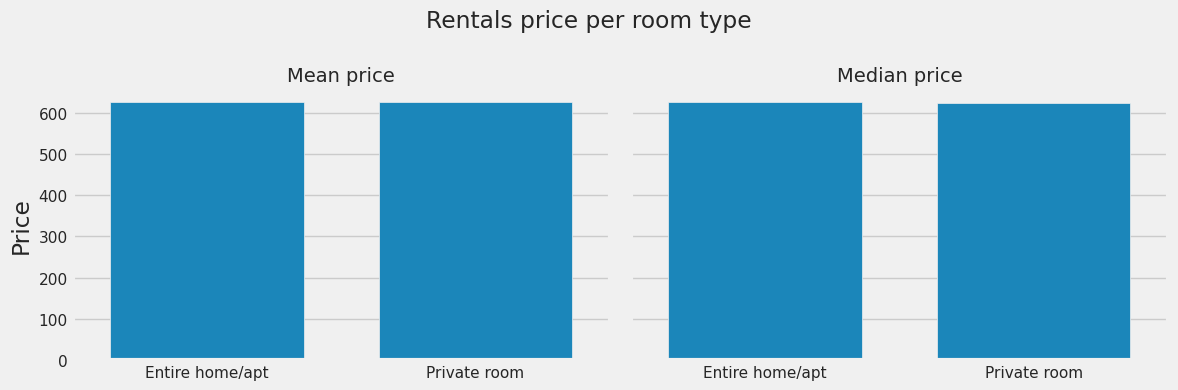

In [15]:
# room type

df_temp = df[df['room type'].isin(['Private room', 'Entire home/apt'])]

room_price_mean = df_temp[['room type', 'price']].groupby('room type', as_index=False)['price'].mean()
room_price_median = df_temp[['room type', 'price']].groupby('room type', as_index=False)['price'].median()

fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)
sns.barplot(data=room_price_mean, x='room type', y='price', ax=axes[0], gap=0.1)
sns.barplot(data=room_price_median, x='room type', y='price', ax=axes[1], gap=0.1)
for ax in axes:
    ax.set(xlabel='', ylabel='Price')
axes[0].set_title('Mean price', fontsize=14)
axes[1].set_title("Median price", fontsize=14)
fig.suptitle("Rentals price per room type")
fig.tight_layout();

#### Reviews vs qualitative variables

In [16]:
df['weighted_reviews'] = df['review rate number'] * df['number of reviews']
df['normalized_weighted_review'] = (df['weighted_reviews'] - df['weighted_reviews'].min()) \
                                    / (df['weighted_reviews'].max() - df['weighted_reviews'].min()) * 100

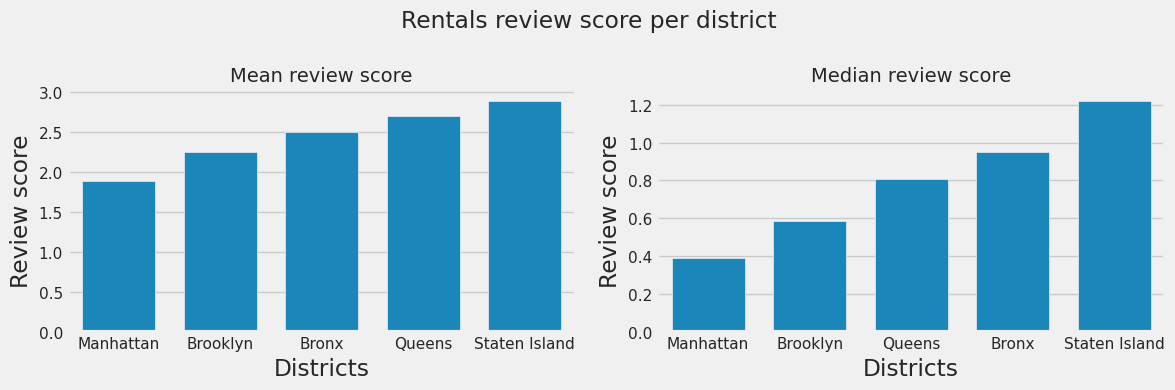

In [17]:
neighbourhood_review_mean = df[['neighbourhood group', 'normalized_weighted_review']].groupby('neighbourhood group', as_index=False)['normalized_weighted_review'].mean().sort_values(by='normalized_weighted_review')
neighbourhood_review_median = df[['neighbourhood group', 'normalized_weighted_review']].groupby('neighbourhood group', as_index=False)['normalized_weighted_review'].median().sort_values(by='normalized_weighted_review')

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.barplot(data=neighbourhood_review_mean, x='neighbourhood group', y='normalized_weighted_review', ax=axes[0], gap=0.1)
sns.barplot(data=neighbourhood_review_median, x='neighbourhood group', y='normalized_weighted_review', ax=axes[1], gap=0.1)
for ax in axes:
    ax.set(xlabel='Districts', ylabel='Review score')
axes[0].set_title('Mean review score', fontsize=14)
axes[1].set_title("Median review score", fontsize=14)
fig.suptitle("Rentals review score per district")
fig.tight_layout();

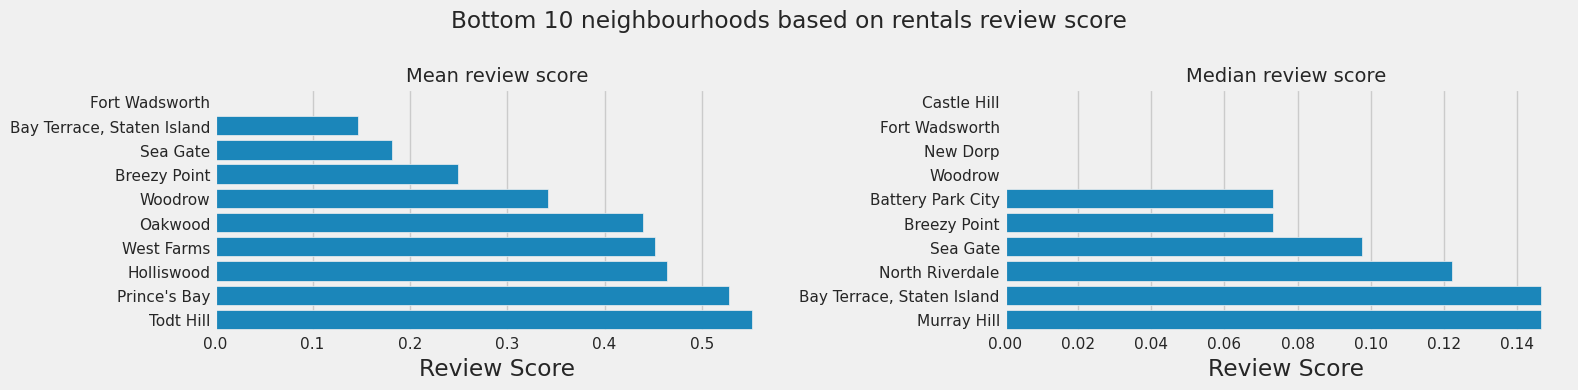

In [18]:
neighbourhood_review_mean = df[['neighbourhood', 'normalized_weighted_review']].groupby('neighbourhood', as_index=False)['normalized_weighted_review'].mean().nsmallest(10, columns='normalized_weighted_review')
neighbourhood_review_median = df[['neighbourhood', 'normalized_weighted_review']].groupby('neighbourhood', as_index=False)['normalized_weighted_review'].median().nsmallest(10, columns='normalized_weighted_review')

fig, axes = plt.subplots(1, 2, figsize=(16, 4))
sns.barplot(data=neighbourhood_review_mean, x='normalized_weighted_review', y='neighbourhood', ax=axes[0], orient='horizontal')
sns.barplot(data=neighbourhood_review_median, x='normalized_weighted_review', y='neighbourhood', ax=axes[1], orient='horizontal')
for ax in axes:
    ax.set(xlabel='Review Score', ylabel='')
axes[0].set_title('Mean review score', fontsize=14)
axes[1].set_title("Median review score", fontsize=14)
fig.suptitle("Bottom 10 neighbourhoods based on rentals review score")
fig.tight_layout();

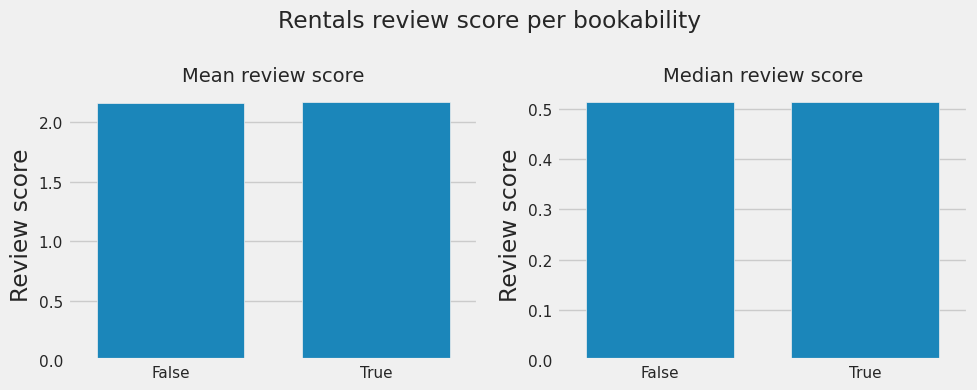

In [19]:
# instant_bookable
bookable_review_mean = df[['instant_bookable', 'normalized_weighted_review']].groupby('instant_bookable', as_index=False)['normalized_weighted_review'].mean()
bookable_review_median = df[['instant_bookable', 'normalized_weighted_review']].groupby('instant_bookable', as_index=False)['normalized_weighted_review'].median()

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.barplot(data=bookable_review_mean, x='instant_bookable', y='normalized_weighted_review', ax=axes[0], gap=0.1)
sns.barplot(data=bookable_review_median, x='instant_bookable', y='normalized_weighted_review', ax=axes[1], gap=0.1)
for ax in axes:
    ax.set(xlabel='', ylabel='Review score')
axes[0].set_title('Mean review score', fontsize=14)
axes[1].set_title("Median review score", fontsize=14)
fig.suptitle("Rentals review score per bookability")
fig.tight_layout();

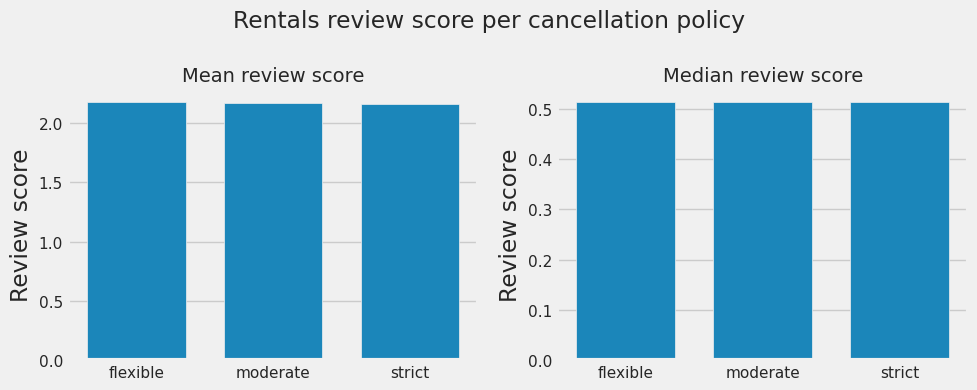

In [20]:
cancellation_price_mean = df[['cancellation_policy', 'normalized_weighted_review']].groupby('cancellation_policy', as_index=False)['normalized_weighted_review'].mean()
cancellation_price_median = df[['cancellation_policy', 'normalized_weighted_review']].groupby('cancellation_policy', as_index=False)['normalized_weighted_review'].median()

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.barplot(data=cancellation_price_mean, x='cancellation_policy', y='normalized_weighted_review', ax=axes[0], gap=0.1)
sns.barplot(data=cancellation_price_median, x='cancellation_policy', y='normalized_weighted_review', ax=axes[1], gap=0.1)
for ax in axes:
    ax.set(xlabel='', ylabel='Review score')
axes[0].set_title('Mean review score', fontsize=14)
axes[1].set_title("Median review score", fontsize=14)
fig.suptitle("Rentals review score per cancellation policy")
fig.tight_layout();

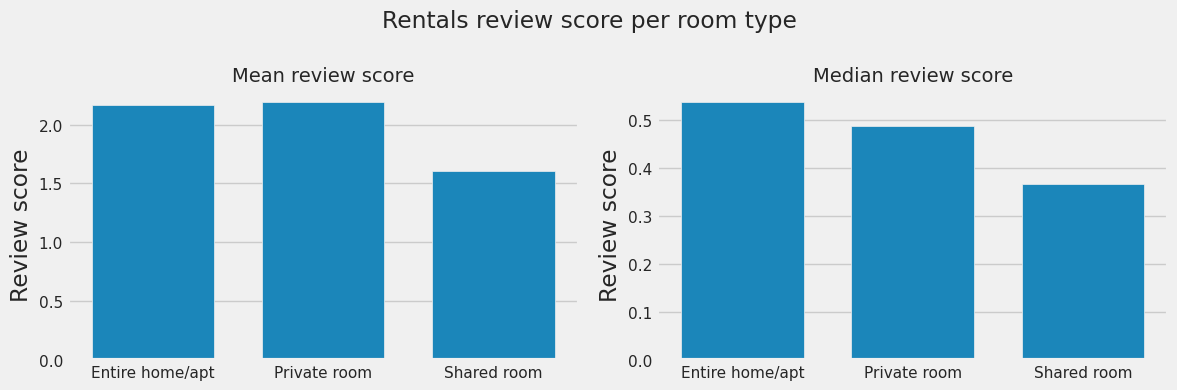

In [21]:
# room type

df_temp = df[df['room type'].isin(['Private room', 'Entire home/apt', 'Shared room'])]

room_price_mean = df_temp[['room type', 'normalized_weighted_review']].groupby('room type', as_index=False)['normalized_weighted_review'].mean()
room_price_median = df_temp[['room type', 'normalized_weighted_review']].groupby('room type', as_index=False)['normalized_weighted_review'].median()

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.barplot(data=room_price_mean, x='room type', y='normalized_weighted_review', ax=axes[0], gap=0.1)
sns.barplot(data=room_price_median, x='room type', y='normalized_weighted_review', ax=axes[1], gap=0.1)
for ax in axes:
    ax.set(xlabel='', ylabel='Review score')
axes[0].set_title('Mean review score', fontsize=14)
axes[1].set_title("Median review score", fontsize=14)
fig.suptitle("Rentals review score per room type")
fig.tight_layout();